# Color Threshold, Green Screen

## Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

## Read in and display the image

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth)
print('Image dimensions:', image.shape)

Image dimensions: (450, 660, 3)


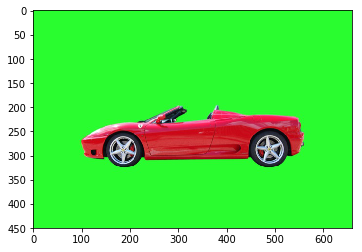

In [3]:
# Display the image
plt.imshow(image)

## Define the color threshold

In [4]:
lower_green = np.array([0,200,0])
upper_green = np.array([100,255,100])

## Create a mask

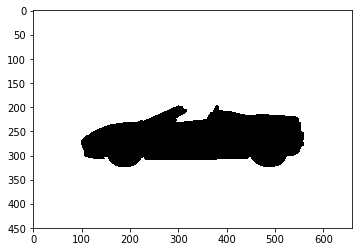

In [5]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

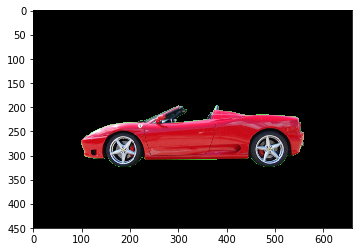

In [6]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

plt.imshow(masked_image)

## Mask and add a background image

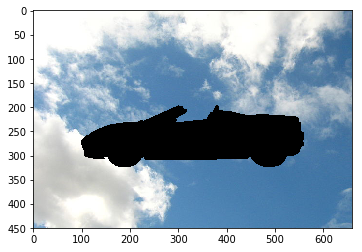

In [10]:
# Load in a backgrond image, and convert it to RGB
background_image = mpimg.imread('images/sky.jpg')

# Crop it 
background_image = background_image[0:450, 
                                    0:660]
# this is due to numpy version <1.16,
# you can fix it by adding before line 130: 
# image.setflags(write=1) or updating numpy 
background_image.setflags(write=1)

# Mask the cropped background so that the car area is blocked
background_image[mask == 0] = [0, 0, 0]

# Display the background and make sure
plt.imshow(background_image)

In [11]:
# to see all flags in the image
background_image.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

## Create a complete image

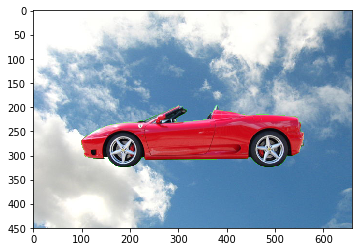

In [13]:
## Add the two images together to create a complete image
complete_image = masked_image + background_image

# Show it!
plt.imshow(complete_image)